In [2]:
import psycopg2 

import pandas as pd
from numpy import *
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())                                                      

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [4]:
def connect():
    conn = None
    try:
        print('Connecting to the PostgresSQL database')
        conn = psycopg2.connect(
            user=os.getenv("DB_USERNAME"),
            password=os.getenv("DB_PASSWORD"),
            host="localhost",
            port=5432,
            database=os.getenv("DB_NAME")
        )
        print('Connected to the PostgresSQL database')
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1)
    print("Connection successful")
    return conn


def postgresql_to_dataframe(conn, select_query, column_names):
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1

    tupples = cursor.fetchall()
    cursor.close()

    df = pd.DataFrame(tupples, columns=column_names)
    return df


In [5]:
conn = connect()

# column_name = ["user_id", "rating", "film_name"]
column_name = ["user_id", "rating", "film_id"]

movies = postgresql_to_dataframe(conn, "select films.id, film_name, image from films",["film_id","title","image"])
rating_df = postgresql_to_dataframe(conn, "select user_id, rating, film_id from ratings", column_name)

rating_df.sort_values(by="film_id", ascending=True)

Connecting to the PostgresSQL database
Connected to the PostgresSQL database
Connection successful


,user_id,rating,film_id
1088560,41190,6,4
1088561,45811,8,4
1088562,201372,6,4
1088563,225396,9,4
1088564,243331,8,4
...,...,...,...
1002652,176993,8,203
1002653,177667,4,203
1002654,178555,8,203
1002640,169383,8,203


In [51]:
user_55135 = postgresql_to_dataframe(conn, "select user_id, film_id, rating from ratings where user_id = 55135", ["user_id", "film_id", "rating"])
print(user_55135)

    user_id  film_id  rating
0     55135       99       7
1     55135      122       4
2     55135      198       3
3     55135       91       7
4     55135      201      10
5     55135       31       7
6     55135      115       9
7     55135      140       7
8     55135      197       8
9     55135       54       8
10    55135      120      10
11    55135       52       4
12    55135      147       8
13    55135       16       1
14    55135      136      10
15    55135      202       8
16    55135       89       8
17    55135       79       9
18    55135       66       8
19    55135        8       1
20    55135      182       4
21    55135       46       8
22    55135       77       1
23    55135       70       7
24    55135      169       7
25    55135      190       7
26    55135       50       8
27    55135      167       6
28    55135      178       3
29    55135       29       1
30    55135       32       4
31    55135       98       8
32    55135      172       9
33    55135   

In [11]:
movies

,film_id,title,image
0,4,Inception,https://m.media-amazon.com/images/M/MV5BMjAxMz...
1,5,The Dark Knight,https://m.media-amazon.com/images/M/MV5BMTMxNT...
2,6,Interstellar,https://m.media-amazon.com/images/M/MV5BZjdkOT...
3,7,Guardians of the Galaxy,https://m.media-amazon.com/images/M/MV5BMTAwMj...
4,8,Fight Club,https://m.media-amazon.com/images/M/MV5BNDIzND...
...,...,...,...
195,199,Lara Croft: Tomb Raider,https://m.media-amazon.com/images/M/MV5BNzMzOD...
196,200,The Breakfast Club,https://m.media-amazon.com/images/M/MV5BOTM5N2...
197,201,Terminator 3: Rise of the Machines,https://m.media-amazon.com/images/M/MV5BMTk5Nz...
198,202,Ocean's Twelve,https://m.media-amazon.com/images/M/MV5BMmJmYz...


In [63]:
final_dataset = rating_df.pivot(index="film_id", columns="user_id", values="rating")
final_dataset.sort_values(by="film_id", ascending=True)
final_dataset.fillna(0, inplace=True)
final_dataset.head(50)


user_id,2,3,4,5,6,8,9,10,11,12,...,270888,270889,270890,270891,270892,270893,270894,270895,270896,600002
film_id,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
SVD_dataset = rating_df.pivot(index="film_id", columns="user_id", values="rating")
SVD_dataset.sort_values(by="film_id", ascending=True)
SVD_dataset.fillna(0, inplace=True)


SVD_no_user_voted = rating_df.groupby('film_id')['rating'].agg('count')
SVD_no_movie_voted = rating_df.groupby('user_id')['rating'].agg('count')


SVD_dataset = SVD_dataset.loc[SVD_no_user_voted[SVD_no_user_voted > 10].index,:]
SVD_dataset = SVD_dataset.loc[:,SVD_no_movie_voted[SVD_no_movie_voted > 50].index]

SVD_dataset = SVD_dataset.to_numpy()
SVD_dataset.shape

(181, 452)

In [32]:
no_user_voted = rating_df.groupby('film_id')['rating'].agg('count')
no_movie_voted = rating_df.groupby('user_id')['rating'].agg('count')
print(no_user_voted)
print(no_movie_voted)

film_id
4          5
5       1319
6          4
7          1
8       3477
       ...  
199     1616
200     7683
201    87901
202    16823
203      503
Name: rating, Length: 200, dtype: int64
user_id
2          3
3          1
4          1
5          1
6          1
          ..
270893     6
270894     4
270895     6
270896    12
600002     1
Name: rating, Length: 187339, dtype: int64


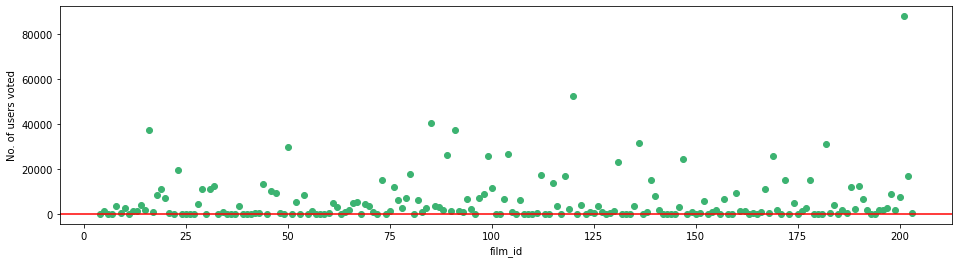

In [27]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating.plot(kind='hist)]
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=5,color='r')
plt.xlabel('film_id')
plt.ylabel('No. of users voted')
plt.show()

In [33]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 5].index,:]

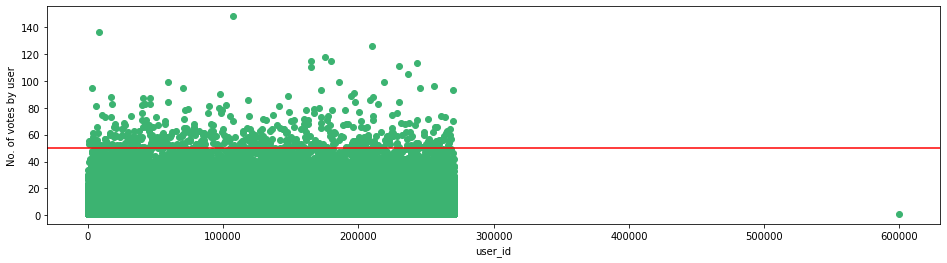

In [15]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movie_voted.index, no_movie_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('user_id')
plt.ylabel('No. of votes by user')
plt.show()

In [16]:
final_dataset = final_dataset.loc[:,no_movie_voted[no_movie_voted > 50].index]

In [17]:
final_dataset

user_id,533,741,2975,3437,3494,3950,4856,5708,5829,6294,...,265067,265335,266243,266783,267131,267404,267772,268239,270123,270213
film_id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,4.0,8.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0
8,0.0,0.0,7.0,8.0,6.0,0.0,6.0,8.0,4.0,6.0,...,4.0,2.0,6.0,0.0,0.0,0.0,0.0,4.0,0.0,6.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,6.0,4.0,0.0,5.0,0.0
10,4.0,6.0,4.0,6.0,0.0,6.0,0.0,0.0,3.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.0,5.0,6.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,5.0,0.0,0.0,6.0,6.0,4.0
200,4.0,0.0,0.0,5.0,0.0,8.0,0.0,6.0,6.0,6.0,...,5.0,8.0,10.0,7.0,0.0,6.0,0.0,0.0,8.0,0.0
201,8.0,8.0,10.0,10.0,8.0,10.0,10.0,0.0,10.0,8.0,...,10.0,8.0,10.0,9.0,6.0,2.0,6.0,6.0,10.0,4.0


In [18]:
sample = np.array([[0,0,3,0,0], [4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size))
print(sparsity)

0.7333333333333334


In [19]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [20]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [21]:
knn = NearestNeighbors(metric='cosine', algorithm='brute',
                       n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [22]:
def get_movie_recommendation(id):
    try: 
        n_movies_to_reccomend = 5
        movie_list = movies[movies['film_id']==id]
        print(movie_list)
        if len(movie_list):
            movie_idx = movie_list.iloc[0]['film_id']
            movie_idx = final_dataset[final_dataset['film_id']
                                    == movie_idx].index[0]
            distances, indices = knn.kneighbors(
                csr_data[movie_idx], n_neighbors=n_movies_to_reccomend+1)
            rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(
            ), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
            recommend_frame = []
            for val in rec_movie_indices:
                movie_idx = final_dataset.iloc[val[0]]['film_id']
                idx = movies[movies['film_id'] == movie_idx].index
                recommend_frame.append(
                    {'Title': movies.iloc[idx]['title'].values[0], 'film_id': movies.iloc[idx]['film_id'].values[0],'image': movies.iloc[idx]['image'].values[0], 'Distance': val[1]})
            df = pd.DataFrame(recommend_frame, index=range(
                1, n_movies_to_reccomend+1))
            movie_recommendation_list = df.to_dict('records')
            
            return df.to_dict('records')
        else:
            return "No movies found. Please check your input"
    except(IndexError) as error:
        print(error)
        return 0


In [23]:
get_movie_recommendation(114)
# recommendation_movies = get_movie_recommendation('Terminator 3: Rise of the Machines')["Title"]
# recommendation_movies_list = recommendation_movies.values.tolist()
# print(recommendation_movies_list)

     film_id     title                                              image
112      114  Godzilla  https://m.media-amazon.com/images/M/MV5BZDFmYT...
index 0 is out of bounds for axis 0 with size 0


0

In [33]:
def ecludSim(inA, inB):
    return 1.0/(1.0+la.norm(inA-inB))


def get_k(sigma, percentage):
    sigma_sqr = sigma**2
    sum_sigma_sqr = sum(sigma_sqr)
    k_sum_sigma = 0
    k = 0
    for i in sigma:
        k_sum_sigma += i**2
        k += 1
        if k_sum_sigma >= sum_sigma_sqr*percentage:
            return k


def svdEst(testdata, user, simMeas, item, percentage):
    n = shape(testdata)[1]
    sim_total = 0.0
    rat_sim_total = 0.0
    u, sigma, vt = la.svd(testdata)
    k = get_k(sigma, percentage)
    # Construct the diagonal matrix
    sigma_k = np.diag(sigma[:k])
    # Convert the original data to k-dimensional space (lower dimension) according to the value of k. formed_items represents the value of item in k-dimensional space after conversion.
    formed_items = np.around(
        np.dot(np.dot(u[:, :k], sigma_k), vt[:k, :]), decimals=3)
    for j in range(n):
        user_rating = testdata[user, j]
        if user_rating == 0 or j == item:
            continue
        # the similarity between item and item j
        similarity = simMeas(formed_items[item, :].T, formed_items[j, :].T)
        sim_total += similarity
        # product of similarity and the rating of user to item j, then sum
        rat_sim_total += similarity*user_rating
    if sim_total == 0:
        return 0
    else:
        return np.round(rat_sim_total/sim_total, decimals=3)


def recommend(testdata, user, sim_meas, est_method, percentage=0.9):
    unrated_items = np.nonzero(testdata[user, :] == 0)[0].tolist()
    if len(unrated_items) == 0:
        return print('everything is rated')
    item_scores = []
    for item in unrated_items:
        estimated_score = est_method(
            testdata, user, sim_meas, item, percentage)
        item_scores.append((item, estimated_score))
    item_scores = sorted(item_scores, key=lambda x: x[1], reverse=True)
    return item_scores


recommend(SVD_dataset, 107720, sim_meas=ecludSim, est_method=svdEst, percentage=0.9)


Error: Canceled future for execute_request message before replies were done

# Part 2: Try to do svd

In [30]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split


In [31]:
reader = Reader(rating_scale=(1.0, 10.0))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(rating_df[['user_id', 'film_id', 'rating']], reader)

algo = SVD()

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.8592  1.8640  1.8599  1.8622  1.8606  1.8612  0.0018  
MAE (testset)     1.4414  1.4447  1.4425  1.4433  1.4427  1.4429  0.0011  
Fit time          61.50   62.19   61.63   62.74   64.64   62.54   1.14    
Test time         2.32    2.86    2.20    1.67    3.14    2.44    0.52    


{'test_rmse': array([1.85915496, 1.8640445 , 1.85988175, 1.86224238, 1.86059853]),
 'test_mae': array([1.44140531, 1.44474125, 1.44253799, 1.44327834, 1.44267501]),
 'fit_time': (61.498169898986816,
  62.193549156188965,
  61.632200956344604,
  62.744953870773315,
  64.6389000415802),
 'test_time': (2.3159520626068115,
  2.8642020225524902,
  2.196233034133911,
  1.672935962677002,
  3.1444320678710938)}

In [64]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

# Load the movielens-100k dataset (download it if needed),

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset = data.build_full_trainset()
testset = Dataset.load_from_df(user_55135[['user_id', 'film_id', 'rating']], reader).build_full_trainset()
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.fit(trainset).test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.8699


1.8698614300067957

In [47]:
uid = str(55135)  # raw user id (as in the ratings file). They are **strings**!
iid = str(136)  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=10, verbose=True)

user: 55135      item: 136        r_ui = 10.00   est = 7.08   {'was_impossible': False}


In [57]:
predict_df = rating_df[["film_id"]]
rating_df['Estimate_Score'] = rating_df['film_id'].apply(lambda x: algo.predict(139925, x).est)

# user_55135 = user_55135.drop('film_id', axis = 1)

rating_df = rating_df.sort_values('Estimate_Score', ascending=False)
print(rating_df.sort_values(by="Estimate_Score",ascending=False).head(80))

        user_id  rating  film_id  Estimate_Score
591914    87405       8      131        9.125447
593370   104665       8      131        9.125447
593354   104475      10      131        9.125447
593355   104493       8      131        9.125447
593356   104505      10      131        9.125447
...         ...     ...      ...             ...
593417   105310      10      131        9.125447
593418   105326      10      131        9.125447
593419   105354       6      131        9.125447
593420   105373      10      131        9.125447
593415   105227       6      131        9.125447

[80 rows x 4 columns]


In [ ]:
not_include_user_55135 = postgresql_to_dataframe(conn, "select user_id, film_id, rating from ratings where user_id != 55135", ["user_id", "film_id", "rating"])
print(not_include_user_55135)

In [62]:
predict_df = predict_df[predict_df['film_id'] != 139925]
predict_df = rating_df[["film_id"]].drop_duplicates()
predict_df['Estimate_Score'] = predict_df['film_id'].apply(lambda x: algo.predict(139925, x).est)

# user_55135 = user_55135.drop('film_id', axis = 1)

predict_df = predict_df.sort_values('Estimate_Score', ascending=False)
print(predict_df.sort_values(by="Estimate_Score",ascending=False).head(70))

         film_id  Estimate_Score
591914       131        9.125447
415959       115        8.894002
65897         91        8.570086
245805        85        8.475955
549681        89        8.326403
...          ...             ...
1078905       48        6.988611
1075892      117        6.986935
918346        20        6.984593
1087982      181        6.983190
1073313      192        6.972196

[70 rows x 2 columns]
